# POS Tagger based on CRF

## # Required Modules

In [85]:
import random
from sklearn_crfsuite import CRF
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

## # Dataset loading

In [105]:
files_all = ["guj_art and culture_sample1.txt", "guj_economy_sample2.txt", "guj_entertainment_sample3.txt", "guj_philosophy_sample4.txt", "guj_religion_sample5.txt", "guj_science and technology_sample6.txt", "guj_sports_sample7.txt"]
word_sentances = []
tag_sentances = []

files = [files_all[1]]

for file_ in files:
    file = open("./dataset/" + file_, "r")
    contents = file.read().split('\n')

    for i in range(1,len(contents)):
        # s = contents[i][10:]
        s = contents[i].split('\t')[1]
        words = []
        tags = []
        for ss in s.split(' '):
            if len(ss.split('\\')) != 2:
                continue
            word = ss.split('\\')[0]
            tag = ss.split('\\')[1]
            words.append(word)
            tags.append(tag)
        word_sentances.append(words)
        tag_sentances.append(tags)

    file.close()
print(word_sentances[-1])
print(tag_sentances[-1])

['બંને', 'વસ્તુઓનું', 'ઉત્પાદન', 'વધારી', 'શકાય', 'છે', '.']
['JJ', 'N_NN', 'N_NN', 'V_VM', 'V_VAUX', 'V_VAUX', 'RD_PUNC']


## # Split dataset into Train-Test (80%-20%)

In [106]:
indexlist = random.sample(range(0, len(word_sentances)), int(len(word_sentances)*0.2))

word_sentances_test = []
tag_sentances_test = []
word_sentances_train = []
tag_sentances_train = []

for i in range(len(word_sentances)):
    if i in indexlist:
        word_sentances_test.append(word_sentances[i])
        tag_sentances_test.append(tag_sentances[i])
    else:
        word_sentances_train.append(word_sentances[i])
        tag_sentances_train.append(tag_sentances[i])

print('Train len ',len(word_sentances_train))
print('Test len ',len(word_sentances_test))

Train len  800
Test len  200


## # Init CRF Model

In [107]:
crf = CRF(algorithm = 'lbfgs',
    c1 = 0.001,
    c2 = 0.001,
    max_iterations = 1000,
    all_possible_transitions=True)

In [108]:
crf.fit(word_sentances_train, tag_sentances_train)

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.001, c2=0.001,
    keep_tempfiles=None, max_iterations=1000)

## # Finding Accuracy Score

In [109]:
def accuracy(tag_sentances_test, test_tag_pred):
    correct_prediction = wrong_prediction = total_predictions = total_word = 0
    passed = 0
    for tag_true, tag_pred in zip(tag_sentances_test, test_tag_pred):
        for pred, actual in zip(tag_pred, tag_true):
            if pred == actual:
                correct_prediction += 1
            else:
                wrong_prediction += 1
            total_predictions += 1
    
    print('Correct pred ', correct_prediction)
    print('Wrong pred ', wrong_prediction)
    print('Total word ', total_predictions)
    return correct_prediction / total_predictions
 
# X, Y = word_sentances_train, tag_sentances_train  # train
X, Y = word_sentances_test, tag_sentances_test    # test
Y_pred = crf.predict(X)
print("accuracy score :", round(accuracy(Y, Y_pred),4))

Correct pred  1947
Wrong pred  525
Total word  2472
accuracy score : 0.7876


## # Results comparisions

### # Accuracy Score: CRF
| Dataset | Train Data Accuracy | Test Data Accuracy |
| --- | --- | --- |
| guj_art and culture_sample1.txt | 0.7455 | 0.7217 |
| guj_economy_sample2.txt | 0.8154 | 0.7876 |
| guj_entertainment_sample3.txt | 0.7572 | 0.7016 |
| guj_philosophy_sample4.txt | 0.7877 | 0.7527 |
| guj_religion_sample5.txt | 0.7494 | 0.7235 |
| guj_science and technology_sample6.txt | 0.7335 | 0.7088 |
| guj_sports_sample7.txt | 0.7331 | 0.7089 |

### # Accuracy Score: HMM
| Dataset | Train Data Accuracy | Test Data Accuracy |
| --- | --- | --- |
| guj_art and culture_sample1.txt | 0.9801 | 0.7413 |
| guj_economy_sample2.txt | 0.9884 | 0.9061 |
| guj_entertainment_sample3.txt | 0.9716 | 0.7680 |
| guj_philosophy_sample4.txt | 0.9866 | 0.8674 |
| guj_religion_sample5.txt | 0.9770 | 0.7100 |
| guj_science and technology_sample6.txt | 0.9810 | 0.8532 |
| guj_sports_sample7.txt | 0.9753 | 0.7824 |

### # Dataset Details
| Index | Dataset | Size (No. of sentence) | Train (No. of sentence) | Test (No. of sentence) |
| --- | --- | --- | --- | --- |
| D1 | guj_art and culture_sample1.txt | 1000 | 800 | 200 |
| D2 | guj_economy_sample2.txt | 1000 | 800 | 200 |
| D3 | guj_entertainment_sample3.txt | 1000 | 800 | 200 |
| D4 | guj_philosophy_sample4.txt | 1000 | 800 | 200 |
| D5 | guj_religion_sample5.txt | 1000 | 800 | 200 |
| D6 | guj_science and technology_sample6.txt | 1000 | 800 | 200 |
| D7 | guj_sports_sample7.txt | 1000 | 800 | 200 |

In [120]:
dataset = ["D1", "D2", "D3", "D4", "D5", "D6", "D7"]

train_acc_crf = [0.7455, 0.8154, 0.7572, 0.7877, 0.7494, 0.7335, 0.7331]
test_acc_crf = [0.7217, 0.7876, 0.7016, 0.7527, 0.7235, 0.7088, 0.7089]

train_acc_hmm = [0.9801, 0.9884, 0.9716, 0.9866, 0.9770, 0.9810, 0.9753]
test_acc_hmm = [0.7413, 0.9061, 0.7680, 0.8674, 0.7100, 0.8532, 0.7824]

### # CRF: Train Acc. v/s Test Acc.

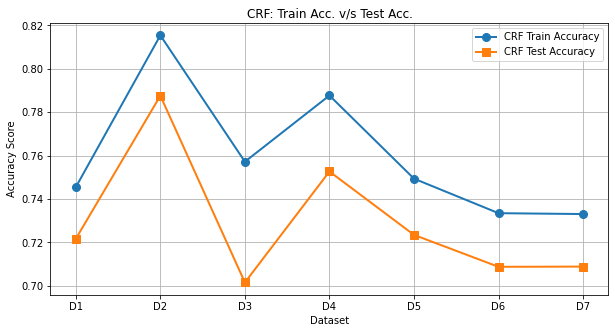

In [140]:
plt.figure(figsize=(10, 5))
plt.plot(dataset, train_acc_crf, label = "CRF Train Accuracy", linewidth = 2, marker = 'o', markersize = 8) 
plt.plot(dataset, test_acc_crf, label = "CRF Test Accuracy", linewidth = 2, marker = 's', markersize = 8) 
plt.title('CRF: Train Acc. v/s Test Acc.') 
plt.xlabel("Dataset")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid()
plt.show()

### # HMM: Train Acc. v/s Test Acc.

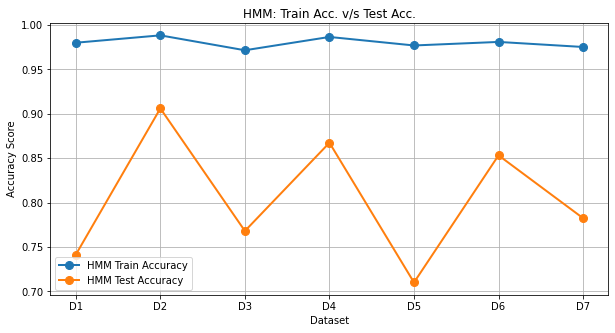

In [139]:
plt.figure(figsize=(10, 5))
plt.plot(dataset, train_acc_hmm, label = "HMM Train Accuracy", linewidth = 2, marker = 'o', markersize = 8) 
plt.plot(dataset, test_acc_hmm, label = "HMM Test Accuracy", linewidth = 2, marker = 'o', markersize = 8) 
plt.title('HMM: Train Acc. v/s Test Acc.') 
plt.xlabel("Dataset")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid()
plt.show()

### # HMM Train Acc. v/s CRF Train Acc.

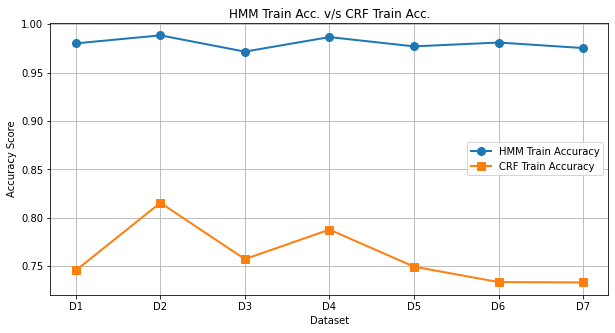

In [141]:
plt.figure(figsize=(10, 5))
plt.plot(dataset, train_acc_hmm, label = "HMM Train Accuracy", linewidth = 2, marker = 'o', markersize = 8) 
plt.plot(dataset, train_acc_crf, label = "CRF Train Accuracy", linewidth = 2, marker = 's', markersize = 8) 
plt.title('HMM Train Acc. v/s CRF Train Acc.') 
plt.xlabel("Dataset")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid()
plt.show()

### # HMM Test Acc. v/s CRF Test Acc.

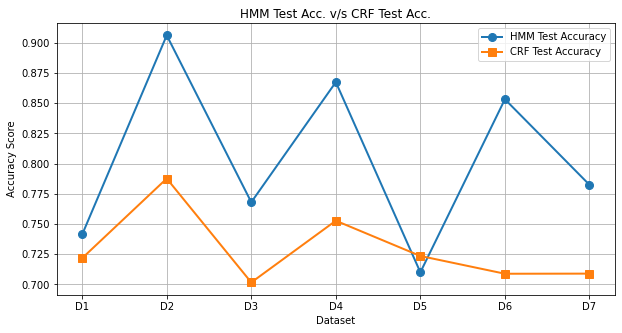

In [138]:
plt.figure(figsize=(10, 5))
plt.plot(dataset, test_acc_hmm, label = "HMM Test Accuracy", linewidth = 2, marker = 'o', markersize = 8) 
plt.plot(dataset, test_acc_crf, label = "CRF Test Accuracy", linewidth = 2, marker = 's', markersize = 8) 
plt.title('HMM Test Acc. v/s CRF Test Acc.') 
plt.xlabel("Dataset")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid()
plt.show()